# **Astronomical Object Detection**


**Context**


The detection of celestial objects observed through telescopes as being either a star, a galaxy or
a quasar, is an important classification scheme in astronomy. A star is an astronomical object
consisting of a luminous plasma spheroid held together by the force of its own gravity. Galaxies
are gravitationally bound groupings or systems of stars that additionally contain other matter
such as stellar remnants, interstellar gas, cosmic dust and even dark matter. Quasars, also
called Quasi-stellar objects (abbv. QSO) are a kind of highly luminous "Active Galactic Nucleus".


**Objectives**


1. The objective of the problem is to use the tabular features available to us about every
astronomical object, to predict whether the object is a star, a galaxy or a quasar,
through the use of supervised machine learning methods.
2. We have to use simple non-linear methods such as k-Nearest Neighbors, Decision Trees
and Random Forest to perform this classification.
3. Perform hyper parameter tuning and compare the accuracy and other performance
measures of different models


**Data Description**

The following dataset consists of 250,000 celestial object observations taken by SDSS.
Each observation is described by 17 feature columns and 1 class column that identifies the real
object to be one of a star, a galaxy or a quasar.

1. objid = Object Identifier, the unique value that identifies the object in the image catalog
used by the CAS
2. u = Ultraviolet filter in the photometric system
3. ra = Right Ascension angle (at J2000 epoch)
4. dec = Declination angle (at J2000 epoch)
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near-Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run = Run Number used to identify the specific scan
10. rerun = Rerun Number to specify how the image was processed
11. camcol = Camera column to identify the scanline within the run
12. field = Field number to identify each field
13. specobjid = Unique ID used for optical spectroscopic objects (this means that 2 different
observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star, or quasar object)
15. redshift = redshift value based on the increase in wavelength

16. plate = plate ID, identifies each plate in SDSS
17. mjd = Modified Julian Date used to indicate when a given piece of SDSS data was taken
18. fiberid = fiber ID that identifies the fiber that pointed the light at the focal plane in each
observation

# **Data Loading and Pre-Processing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Predictive Analysis/Practical7/Copy of astronomy_2k.csv')
# returns the first 5 rows
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237660e+18,196.362072,7.667016,19.32757,19.20759,19.16249,19.07652,18.86196,3842,301,4,102,2.020030e+18,QSO,1.984419,1794,54504,594
1,1.237660e+18,206.614664,45.924279,18.95918,17.09173,16.25019,15.83413,15.55686,3699,301,5,121,1.649590e+18,GALAXY,0.064456,1465,53082,516
2,1.237660e+18,220.294728,40.894575,17.75587,16.54700,16.67694,16.77780,16.88097,3699,301,2,194,3.812390e+18,STAR,-0.000509,3386,54952,330
3,1.237670e+18,206.315349,27.438152,19.29195,19.12720,19.03992,18.76714,18.73874,4649,301,2,152,6.762290e+18,QSO,1.882893,6006,56105,496
4,1.237670e+18,228.092653,20.807371,19.19731,18.26143,17.89954,17.76130,17.68726,4670,301,3,201,4.454290e+18,STAR,-0.000295,3956,55656,846


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      1999 non-null   float64
 1   ra         1999 non-null   float64
 2   dec        1999 non-null   float64
 3   u          1999 non-null   float64
 4   g          1999 non-null   float64
 5   r          1999 non-null   float64
 6   i          1999 non-null   float64
 7   z          1999 non-null   float64
 8   run        1999 non-null   int64  
 9   rerun      1999 non-null   int64  
 10  camcol     1999 non-null   int64  
 11  field      1999 non-null   int64  
 12  specobjid  1999 non-null   float64
 13  class      1999 non-null   object 
 14  redshift   1999 non-null   float64
 15  plate      1999 non-null   int64  
 16  mjd        1999 non-null   int64  
 17  fiberid    1999 non-null   int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 281.2+ KB


In [ ]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.999000e+03,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.0,1999.000000,1999.000000,1.999000e+03,1999.000000,1999.000000,1999.000000,1999.000000
mean,1.237663e+18,175.686638,24.710830,18.649833,17.454225,16.954382,16.711598,16.575528,4038.337669,301.0,3.674337,180.567284,3.101671e+18,0.180072,2754.745873,54009.298149,374.904952
std,8.118438e+12,81.893729,19.850494,0.822500,0.974258,1.104073,1.175482,1.271501,1763.173444,0.0,1.529980,138.275524,2.755543e+18,0.455794,2447.399122,1659.024314,218.763115
min,1.237650e+18,0.075739,-16.203443,13.897990,12.952380,12.338230,12.129100,11.848380,109.000000,301.0,1.000000,11.000000,2.995940e+17,-0.003808,266.000000,51609.000000,1.000000
25%,1.237660e+18,130.199091,5.341016,18.238280,16.910445,16.281750,15.965230,15.733195,2827.500000,301.0,2.000000,83.000000,1.280285e+18,-0.000061,1137.000000,52707.000000,194.500000
50%,1.237660e+18,179.669287,25.213328,18.886750,17.549820,16.979840,16.667240,16.519640,3893.000000,301.0,4.000000,147.000000,2.430870e+18,0.034845,2159.000000,53792.000000,381.000000
75%,1.237670e+18,226.161158,40.436812,19.287790,18.078910,17.632000,17.419355,17.343400,5183.000000,301.0,5.000000,231.000000,3.547810e+18,0.092940,3151.000000,54806.000000,529.000000
max,1.237680e+18,359.882563,82.567500,19.599720,19.861680,20.383660,20.354700,22.853130,8156.000000,301.0,6.000000,845.000000,1.278690e+19,2.868036,11357.000000,58522.000000,1000.000000


In [ ]:
print(df.isnull().sum())

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


In [ ]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237660e+18,196.362072,7.667016,19.32757,19.20759,19.16249,19.07652,18.86196,3842,301,4,102,2.020030e+18,1,1.984419,1794,54504,594
1,1.237660e+18,206.614664,45.924279,18.95918,17.09173,16.25019,15.83413,15.55686,3699,301,5,121,1.649590e+18,0,0.064456,1465,53082,516
2,1.237660e+18,220.294728,40.894575,17.75587,16.54700,16.67694,16.77780,16.88097,3699,301,2,194,3.812390e+18,2,-0.000509,3386,54952,330
3,1.237670e+18,206.315349,27.438152,19.29195,19.12720,19.03992,18.76714,18.73874,4649,301,2,152,6.762290e+18,1,1.882893,6006,56105,496
4,1.237670e+18,228.092653,20.807371,19.19731,18.26143,17.89954,17.76130,17.68726,4670,301,3,201,4.454290e+18,2,-0.000295,3956,55656,846


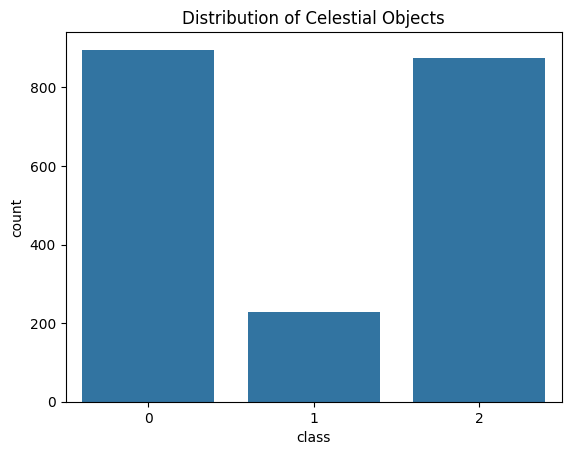

In [ ]:
sns.countplot(x='class', data=df)
plt.title('Distribution of Celestial Objects')
plt.show()

In [ ]:
X = df.drop(columns=['class'])
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#**Decision Tree**

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       174
           1       0.98      0.93      0.95        45
           2       1.00      0.99      0.99       181

    accuracy                           0.98       400
   macro avg       0.98      0.97      0.98       400
weighted avg       0.99      0.98      0.98       400

Accuracy: 0.985


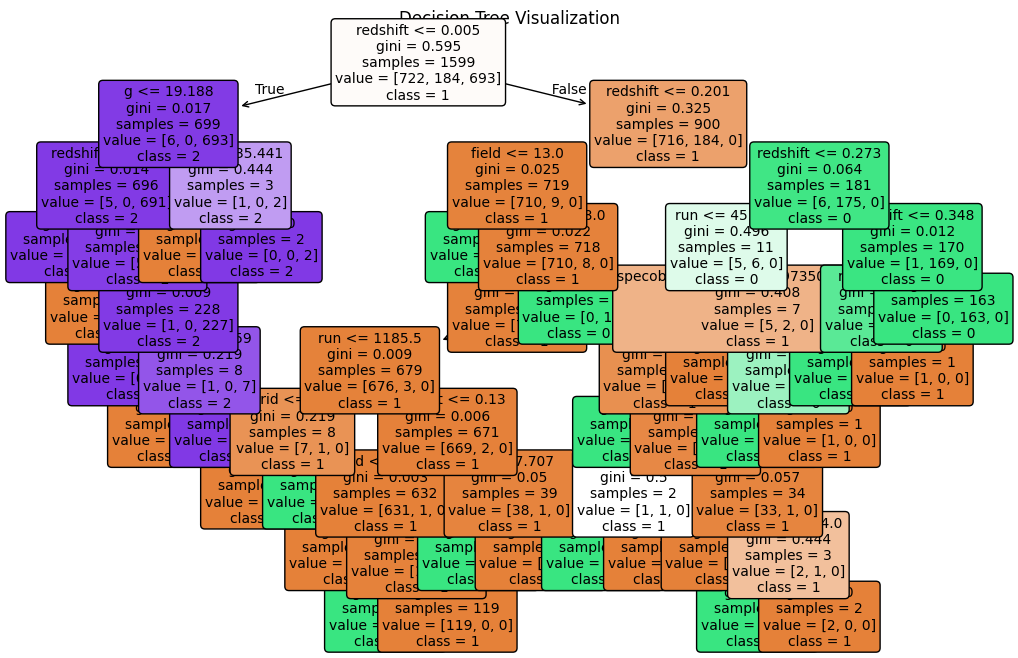

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the unique class labels from y_train
class_names = [str(cls) for cls in y_train.unique()]

# Visualizing the trained decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=class_names, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


# **Random Forest**

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       174
           1       1.00      0.89      0.94        45
           2       0.99      1.00      0.99       181

    accuracy                           0.98       400
   macro avg       0.99      0.96      0.97       400
weighted avg       0.98      0.98      0.98       400

Accuracy: 0.9825


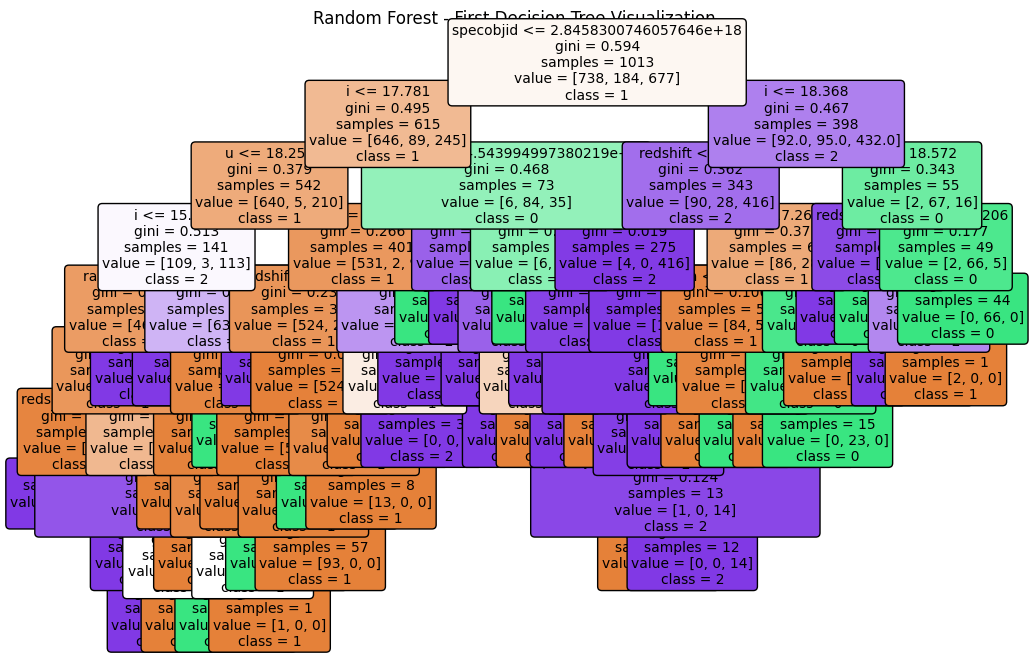

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the first tree in the random forest
tree = rf.estimators_[0]

plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=[str(cls) for cls in y_train.unique()], rounded=True, fontsize=10)
plt.title("Random Forest - First Decision Tree Visualization")
plt.show()


# **Hyperparameter Tuning (GridSearchCV)**

In [ ]:
# For Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)
print("Best DT Params:", grid_dt.best_params_)

# For Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("Best RF Params:", grid_rf.best_params_)

Best DT Params: {'max_depth': 20, 'min_samples_split': 10}
Best RF Params: {'max_depth': None, 'n_estimators': 200}


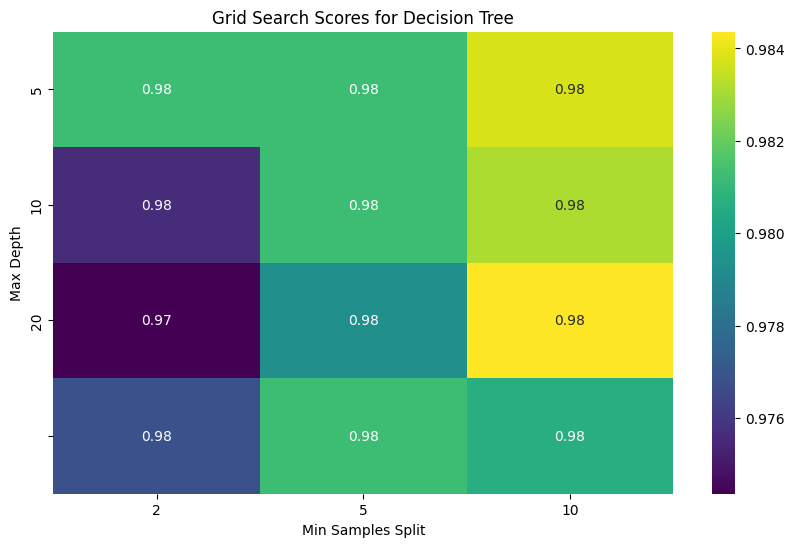

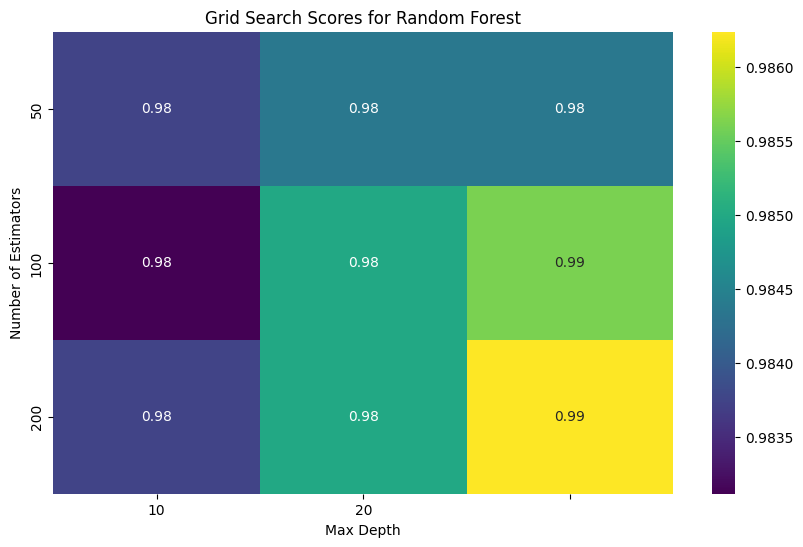

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# For Decision Tree Visualization
cv_results_dt = grid_dt.cv_results_

# Reshape the results into a 2D matrix for heatmap
mean_test_scores_dt = np.array(cv_results_dt['mean_test_score']).reshape(len(param_grid_dt['max_depth']), len(param_grid_dt['min_samples_split']))

# Plot the heatmap for Decision Tree
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores_dt, annot=True, cmap="viridis", xticklabels=param_grid_dt['min_samples_split'], yticklabels=param_grid_dt['max_depth'])
plt.title('Grid Search Scores for Decision Tree')
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.show()

# For Random Forest Visualization
cv_results_rf = grid_rf.cv_results_

# Reshape the results into a 2D matrix for heatmap
mean_test_scores_rf = np.array(cv_results_rf['mean_test_score']).reshape(len(param_grid_rf['n_estimators']), len(param_grid_rf['max_depth']))

# Plot the heatmap for Random Forest
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores_rf, annot=True, cmap="viridis", xticklabels=param_grid_rf['max_depth'], yticklabels=param_grid_rf['n_estimators'])
plt.title('Grid Search Scores for Random Forest')
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.show()


In [ ]:
best_dt = grid_dt.best_estimator_
best_rf = grid_rf.best_estimator_

y_pred_dt_tuned = best_dt.predict(X_test)
y_pred_rf_tuned = best_rf.predict(X_test)

print("Tuned DT Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))
print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))

Tuned DT Accuracy: 0.99
Tuned RF Accuracy: 0.9825


# **Model Comparison & Visualization**

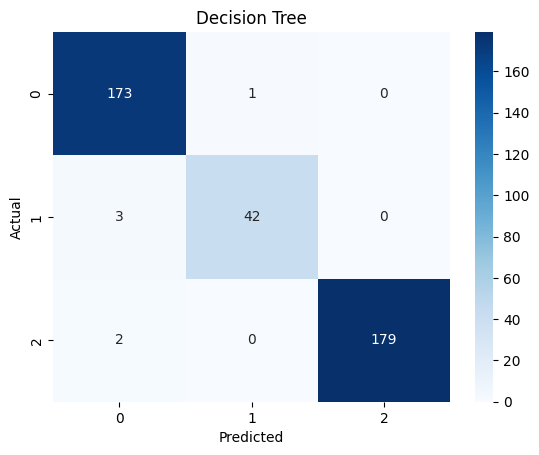

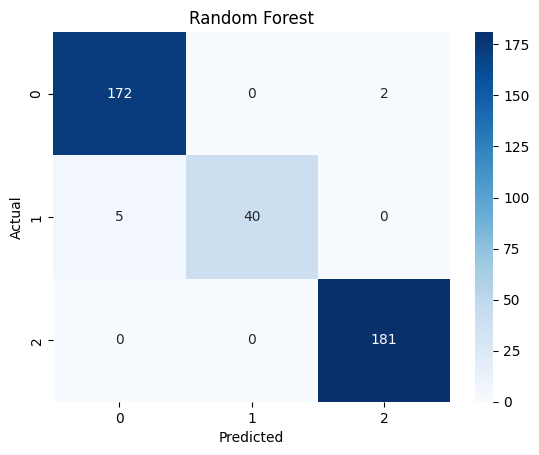

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

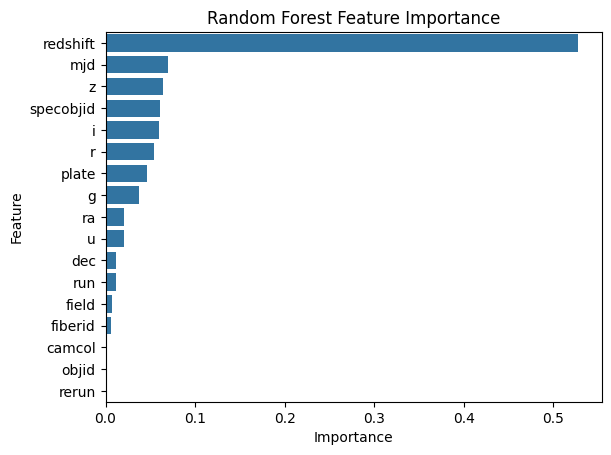

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()